<a href="https://colab.research.google.com/github/sadaqatali1234/Deep-learning-assigments/blob/main/Concrete_Strength_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Compresive Strength Concrete Problem


### Abstract: 

Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.  <br><br>

<table border="1"  cellpadding="6" bordercolor="red">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">1030</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">9</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">2007-08-03</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">231464</p></td>
	</tr>
    </tbody>
    </table>

###  Description:
| Features Name | Data Type | Measurement | Description |
| -- | -- | -- | -- |
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable
Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable
Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable
Water (component 4) | quantitative | kg in a m3 mixture | Input Variable
Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable
Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable
Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable
Age | quantitative | Day (1~365) | Input Variable
Concrete compressive strength | quantitative | MPa | Output Variable

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature )
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
- Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
- Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
- Train the Model with Epochs (100) and validate it
- If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv)

In [52]:
# importing libarires
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras import models, layers , optimizers

In [53]:
# drive mounting
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [54]:
# loading data 
df= pd.read_csv("/content/gdrive/MyDrive/compresive_strength_concrete.csv")

In [55]:
# check first five rows
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [56]:
# check null values in dataframe
df.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [57]:
#statistical description of dataframe
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [58]:
# check all information of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [59]:
# to gets columns name
df.keys()

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [60]:
# split dataframe into input and output
data=df.iloc[:,:8]
labels=df.iloc[:,-1]

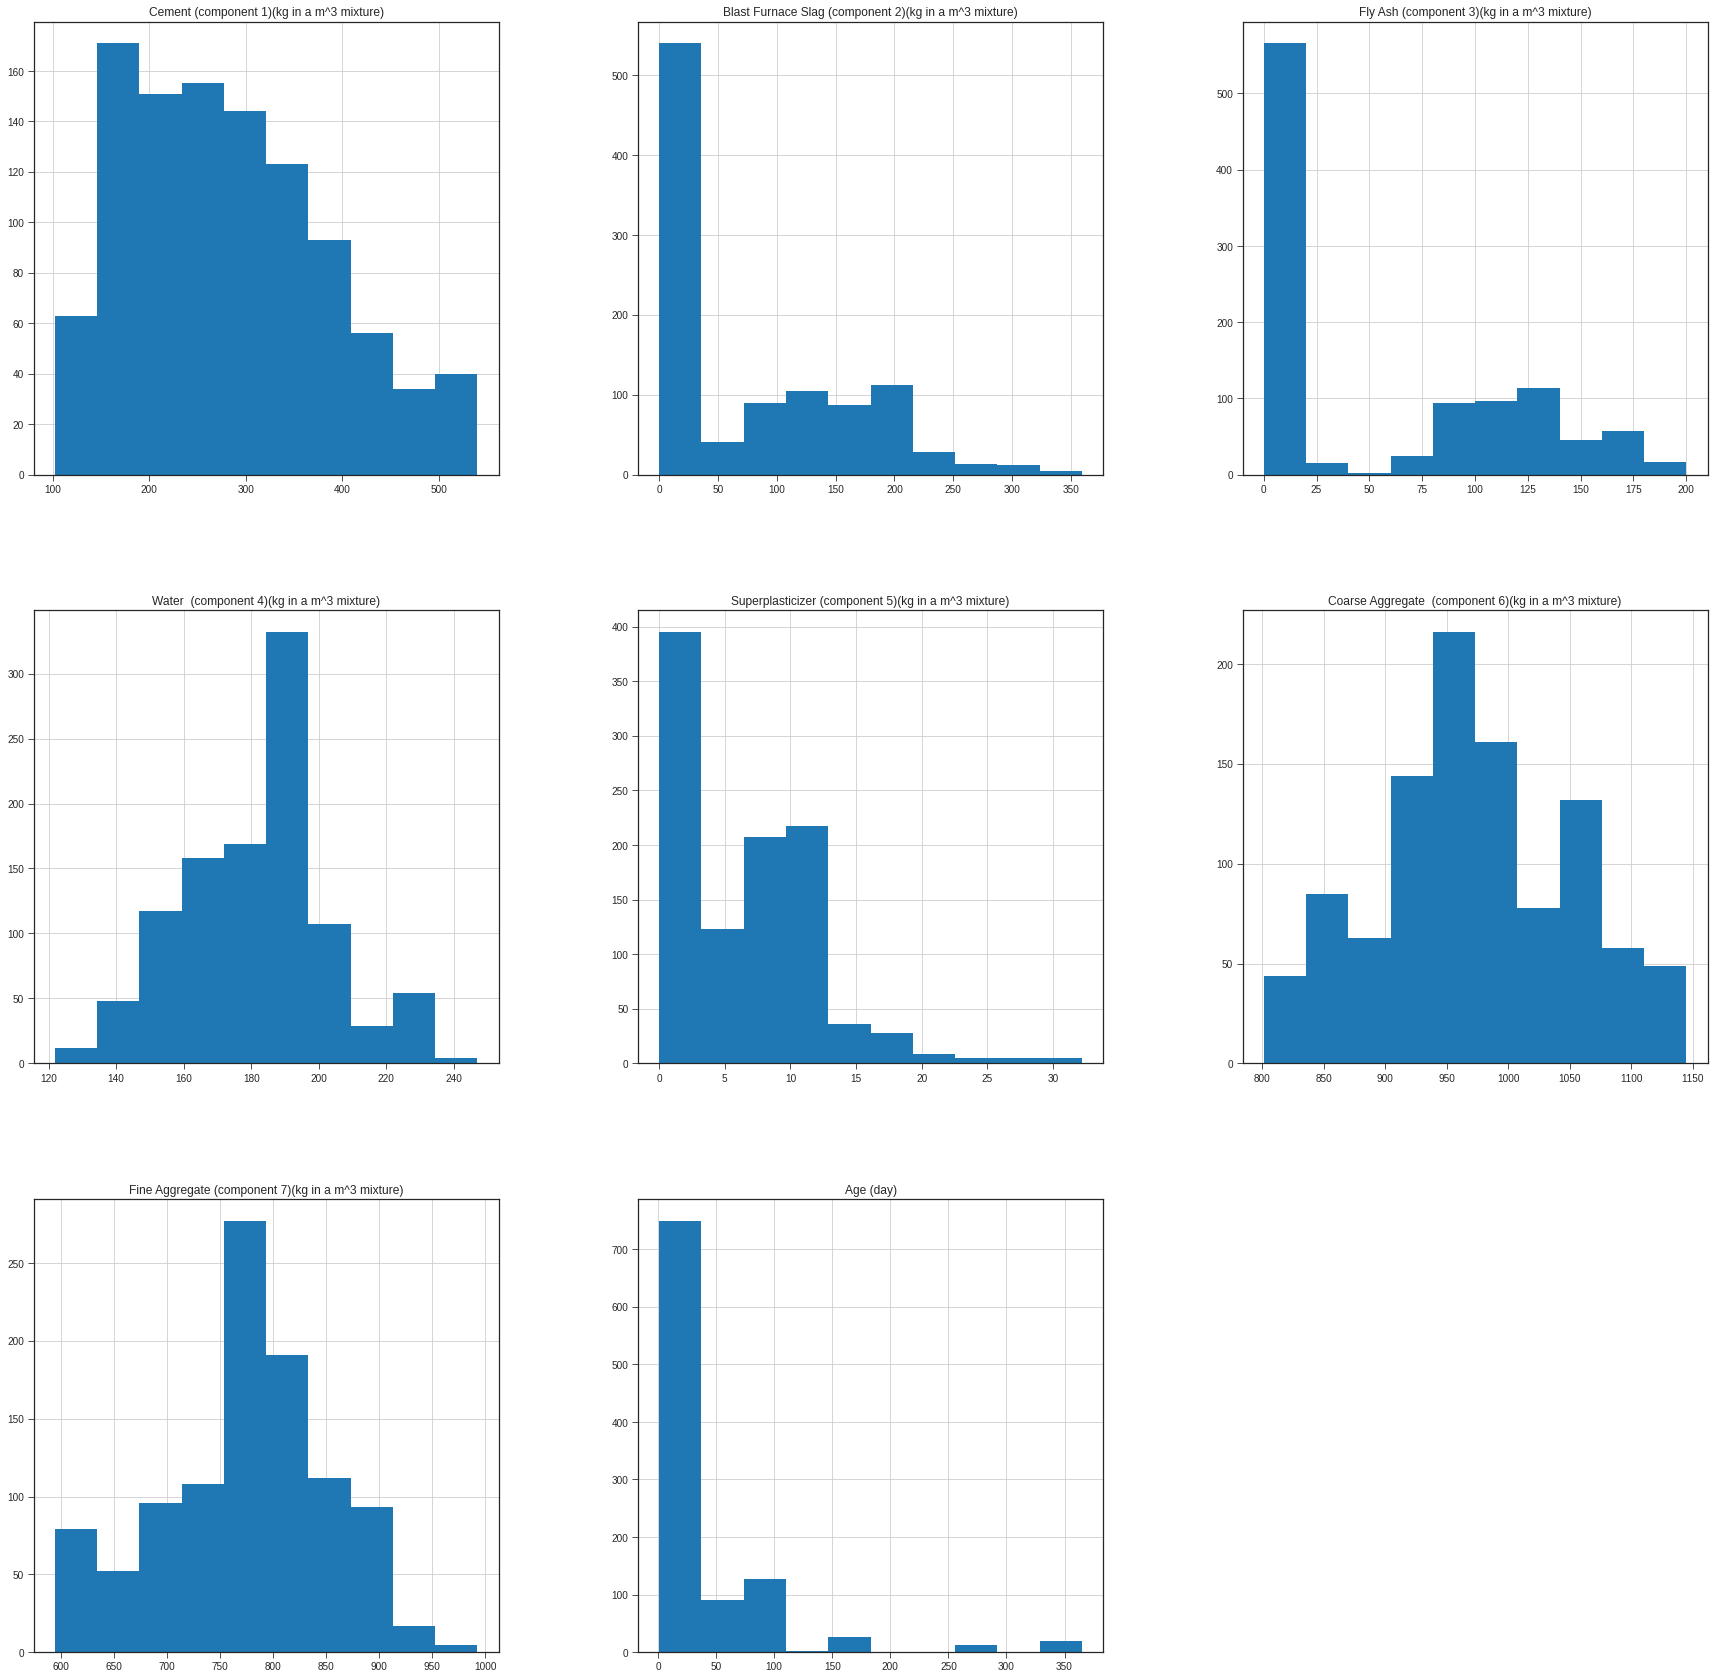

In [61]:
# show all input data in histogram
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-ticks')
pd.DataFrame.hist(data,figsize = [30,30])
plt.show()

In [62]:
# standardized or normalized the data (input variables)
mean = data.mean(axis=0)
data-= mean
std = data.std(axis=0)
data/= std

In [63]:
# standardized or normalized the data (output variables)
labels_mean = labels.mean(axis=0)
labels-= labels_mean
labels_std = labels.std(axis=0)
labels/= labels_std


In [64]:
# data spliting into train & test
X_train=data.sample(frac=0.7,random_state=1)
X_test=data.sample(frac=0.3,random_state=1)
y_train=labels.sample(frac=0.7,random_state=1)
y_test=labels.sample(frac=0.3,random_state=1)

In [65]:
# check training data and training targets
print(f"Shape of training data :{X_train.shape},\nShape of training labels:{y_train.shape}")

Shape of training data :(721, 8),
Shape of training labels:(721,)


In [66]:
# check testing data and testing targets
print(f"Shape of testing data :{X_test.shape},\nShape of testing labels:{y_test.shape}")

Shape of testing data :(309, 8),
Shape of testing labels:(309,)


In [67]:
# convert dataframe into numpy array
X_train= np.asarray(X_train).astype('float32')
X_test= np.asarray(X_test).astype('float32')
#y_train= np.asarray(y_train).astype('float32')
#y_test= np.asarray(y_test).astype('float32')


In [68]:
# training data distrubted into validation data
val_X = X_train[:230]
partial_X_train=X_train[230:]
val_y=y_train[:230]
partial_y_train=y_train[230:]


In [69]:
# importing models libarires
from keras import models, layers , optimizers

In [70]:
# model building
network=models.Sequential()
network.add(tf.keras.layers.Dense(10,activation="relu",input_shape=(X_train.shape[1],)))
network.add(tf.keras.layers.Dropout(0.2))
network.add(tf.keras.layers.Dense(8,activation="relu"))
network.add(tf.keras.layers.Dropout(0.2))
network.add(tf.keras.layers.Dense(6,activation="relu"))
#network.add(tf.keras.layers.Dropout(0.5))
network.add(tf.keras.layers.Dense(1))



In [71]:
# model summary
network.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                90        
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 88        
_________________________________________________________________
dropout_3 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 239
Trainable params: 239
Non-trainable params: 0
________________________________________________________

In [72]:
# model compiling
network.compile(optimizer=optimizers.RMSprop(lr=0.001), loss="mse",metrics=['mae'])

In [73]:
# model training
history=network.fit(partial_X_train,partial_y_train,epochs=100,validation_data=(val_X,val_y),batch_size=1,verbose=1)

Epoch 1/100
491/491 [==============================] - 2s 2ms/step - loss: 0.8081 - mae: 0.7039 - val_loss: 0.5223 - val_mae: 0.5575
Epoch 2/100
491/491 [==============================] - 1s 2ms/step - loss: 0.5953 - mae: 0.6016 - val_loss: 0.4603 - val_mae: 0.5341
Epoch 3/100
491/491 [==============================] - 1s 2ms/step - loss: 0.5591 - mae: 0.6134 - val_loss: 0.4150 - val_mae: 0.4978
Epoch 4/100
491/491 [==============================] - 1s 2ms/step - loss: 0.5916 - mae: 0.6087 - val_loss: 0.4170 - val_mae: 0.5081
Epoch 5/100
491/491 [==============================] - 1s 2ms/step - loss: 0.5415 - mae: 0.5635 - val_loss: 0.3901 - val_mae: 0.4911
Epoch 6/100
491/491 [==============================] - 1s 2ms/step - loss: 0.4940 - mae: 0.5441 - val_loss: 0.4026 - val_mae: 0.5058
Epoch 7/100
491/491 [==============================] - 1s 2ms/step - loss: 0.4656 - mae: 0.5138 - val_loss: 0.3750 - val_mae: 0.4854
Epoch 8/100
491/491 [==============================] - 1s 2ms/step - 

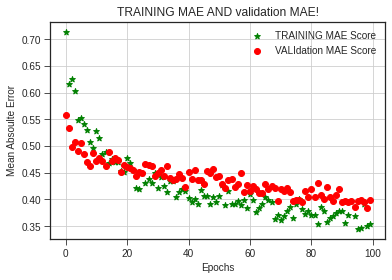

In [84]:
# show training and validation MAE
y1=history.history['mae']
x1=history.history['val_mae']
x=range(100)
plt.scatter(x,y1 , label= "TRAINING MAE Score", color= "green", marker= "*")
plt.scatter(x,x1, label= "VALIdation MAE Score", color= "r")
plt.xlabel('Epochs')
plt.ylabel('Mean Absoulte Error')
plt.title('TRAINING MAE AND validation MAE!')
plt.legend()
plt.grid()
plt.show()


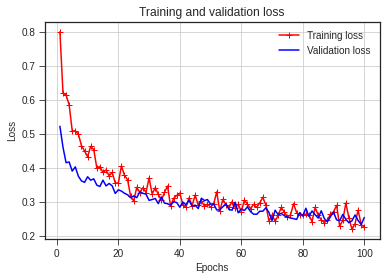

In [85]:
#show training and validation loss in graph
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r',marker="+", label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [86]:
# model evaluating on test data & label
test_mse_score, test_mae_score = network.evaluate(X_test, y_test)

10/10 [==============================] - 0s 2ms/step - loss: 0.2443 - mae: 0.3945


In [87]:
# check test mean squared error
test_mse_score

0.2443053126335144

In [88]:
# check test mean absoulte error
test_mae_score

0.39450588822364807

In [89]:
# check presdictions on testing data
y_pred = network.predict(X_test)
y_pred=y_pred*labels_std+labels_mean

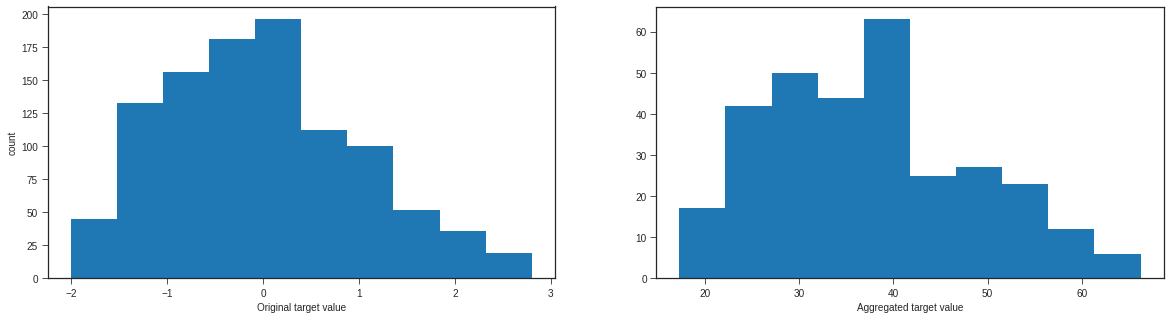

In [90]:
# check ploting of aggreted and actual values
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1 )
plt.hist(labels)
plt.xlabel('Original target value')
plt.ylabel('count')
plt.subplot(1, 2, 2)
plt.hist(y_pred)
plt.xlabel('Aggregated target value')
plt.show()